#### Data Science Project

#### Question
+ Predict if a patient will live or dies based on the parameters using ML


#### Workflow
+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpret Model
+ Serialization
+ Production with Streamlit or Flask


In [1]:
# Load Our EDA Pkgs
import pandas as pd 
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [3]:
# Load Our Dataset
df = pd.read_csv("hepatitis.data")

In [4]:
# Preview the first 5 rows of data
df.head()

# We notice that there are no column names! We need to assign the correct col names to our data

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [8]:
# We create a variable containing names of the columns. Column names was provided in the UCI repository.
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE",
             "MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE",
             "SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]


In [9]:
df = pd.read_csv("hepatitis.data", names=col_names)

In [10]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [11]:
# We print out our column names to make sure that the data has correct col names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [12]:
# Convert column names to lowercase
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [15]:
# We notice that there are a few ? marks. Therefore, we check for data types first.
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [17]:
# Replace ? with 0
df = df.replace('?',0)

In [18]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [19]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [22]:
# How many columns have object data type
sum(df.dtypes == 'object')

15

In [24]:
# Names of the columns that have 'Object' data type
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [27]:
# Casting
# Convert from one data-type to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

# We got an error while converting to int since 2 columns had float values, we will handle them after this step

In [28]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [30]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)
# Converted to float instead of int since values have decimal points

In [31]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

#### Narrative
+ Most of the data were of object datatype
+ Two of them were in float

In [32]:
### Count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [33]:
# Shape of dataset
df.shape

(155, 20)

In [34]:
# Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

#### EDA
+ Descriptive analytics

In [35]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [35]:
# Create a dictionary for our target variable
target_label = {"Die":1,"Live":2}

In [37]:
# Value counts
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

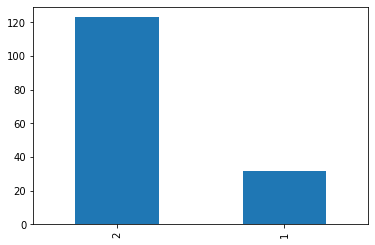

In [38]:
# Plot of Count
df['class'].value_counts().plot(kind='bar')

In [39]:
# How many are males(1) and females(2)
df['sex'].unique()

array([2, 1], dtype=int64)

In [40]:
# Counts of male and female
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

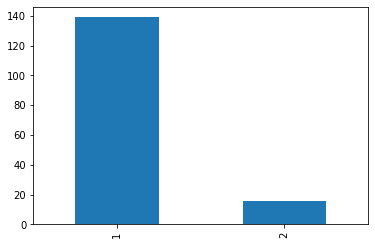

In [41]:
df['sex'].value_counts().plot(kind='bar')

### Narrative
+ There are more males than females in our dataset
+ More 'live' than 'Die'

In [43]:
### Age Range -               NOT VERY INFORMATIVE THIS ONE!
#df.groupby(['age','sex']).size()

#### Frequency Distribution Table using the Age Range

In [52]:
print("Maximum Age :", df['age'].max(), '---',"Minimum Age :", df['age'].min())

Maximum Age : 78 --- Minimum Age : 7


In [56]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins = [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()
# PD.CUT allows us to cut the data into the bins specified by us

In [57]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [58]:
# Creating a DF using the freq dist shown above
freq_df = freq_df.reset_index(name ='count')

In [59]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


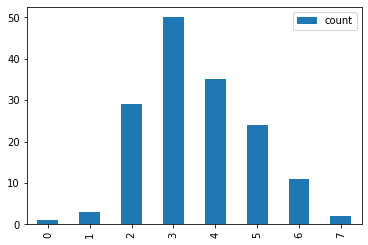

In [60]:
# Now we will plot a bar chart for the frequency dist
freq_df.plot(kind='bar')

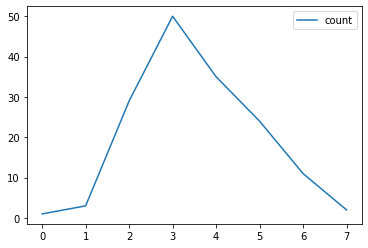

In [62]:
# A line chart for the same freq dist
freq_df.plot(kind='line')

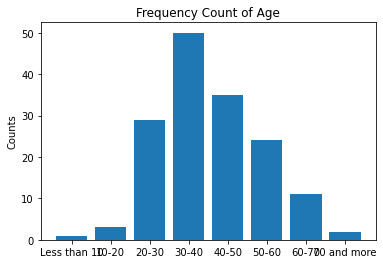

In [63]:
# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

### Narative
+ Highest prevalence of Hepatitis is in the age group from 30-40 followed by 40-50
+ The least is found in individual under 10 and in elderly above 70

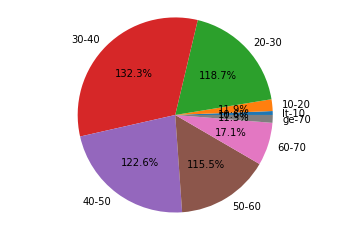

In [54]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Checking for Outliers
+ Univariate Analysis
+ Multivariate Analysis

#### Methods
+ Boxplot( # Good for Univariate)
+ Scatterplot ( # Good for Multivariate)
+ Z-score
+ IQR Interquartile Range

In [55]:
# Using Boxplot for Univariate Outlier Detection
import seaborn as sns

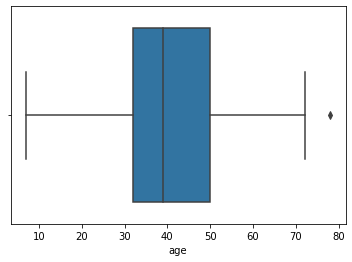

In [64]:
sns.boxplot(df['age'])

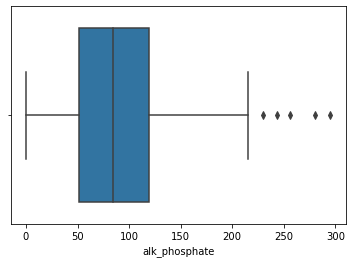

In [65]:
sns.boxplot(df['alk_phosphate'])

In [58]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


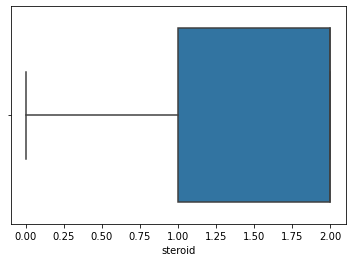

In [66]:
# using boxplot for outlier detection

sns.boxplot(df['steroid'])

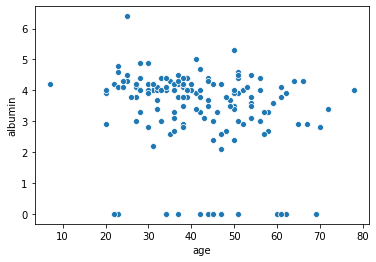

In [67]:
# Scatterplot
sns.scatterplot(df['age'],df['albumin'])

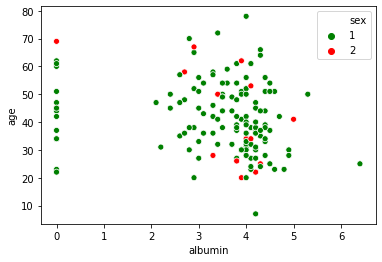

In [68]:
# Scatter plot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'], palette=['green','red'],data=df)

#### using Interquartile Range(IQR)
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [68]:
# IQR is q3-q1. Therefore we will find our first quartile and third quartile
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [69]:
IQR = q3 - q1

In [70]:
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [71]:
# Get the actual datapoints that are outliers
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narative
+ The data points with true are the outlier


##### Solution
+ Remove
+ Change
+ Ignore

In [75]:
# Creating a dataset with no outliers (Just to see)
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [76]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [77]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


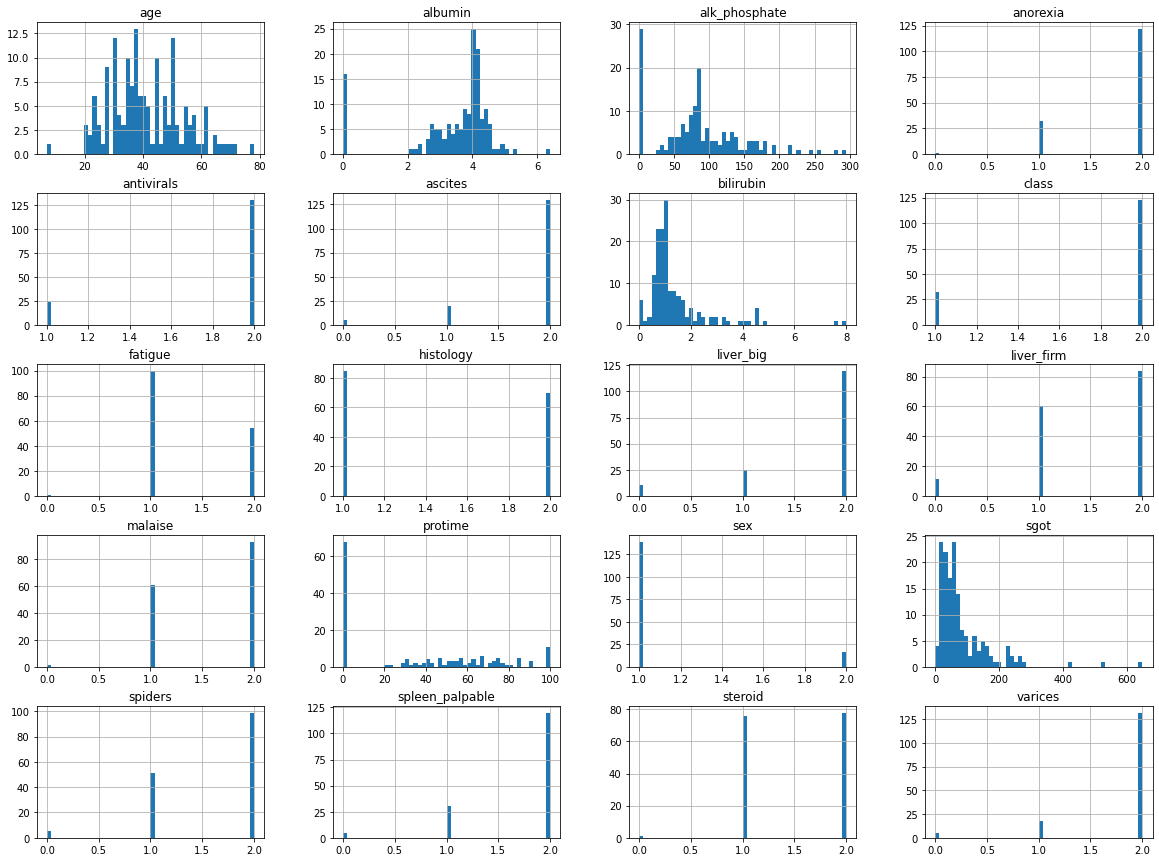

In [78]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

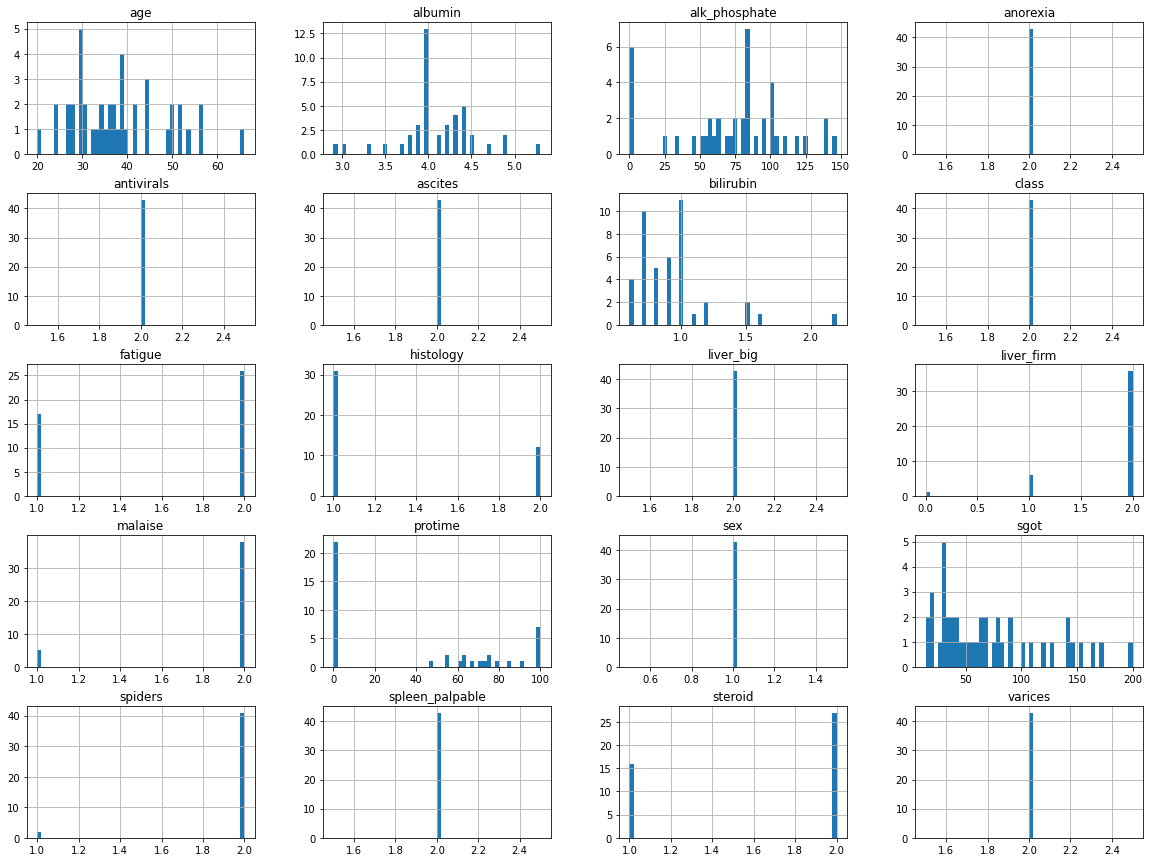

In [79]:
### Plot of distribution of data
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

#### Feature Selection and Importance
+ SelectKbest
    - Strong relation with the output/target
+ Recursive Feature Elimination

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

+ sklearn.feature_selection.chi2

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables (random variables), so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [81]:
# Features and Labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [82]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [83]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [84]:
# Prepping to find the best features to train our model
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit = skb.fit(xfeatures, ylabels)

In [86]:
# Highest score shows the best fit
print("Scores", best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [87]:
# Transform(Optional)
bf_02 = best_feature_fit.transform(xfeatures)

In [88]:
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [91]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [92]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [93]:
feature_column_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores, feature_column_names], axis=1)

In [95]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [96]:
# Get the best
# The higher the number the more important the feature
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [104]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [136]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [98]:
logit = LogisticRegression()

In [101]:
rfe = RFE(logit, n_features_to_select = 8)

In [102]:
rfe_fit = rfe.fit(xfeatures, ylabels)
# Now RFE will work with the xfeatures and compare them against the ylables to get the best features for our model

C:\Users\Anoop\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anoop\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [104]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['ranking_Features'])

In [107]:
rfe_feature_df = pd.concat([feature_column_names, selected_features, ranking_features], axis=1)

In [108]:
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


### Narative
+ RFE we will eliminate the lowest ranking or 'true labels' from the above table

#### Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [109]:
from sklearn.ensemble import ExtraTreesClassifier

In [110]:
# Initializing
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels)

ExtraTreesClassifier()

In [112]:
# Print Important Features
print(et_clf.feature_importances_)

[0.05019079 0.02072404 0.02922011 0.0088949  0.02760645 0.05658683
 0.02635629 0.03966697 0.05225495 0.03553172 0.0744967  0.09949082
 0.05558088 0.10031753 0.07690112 0.04968256 0.07820511 0.0601484
 0.0581438 ]


In [113]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)

In [114]:
feature_imporance_df

age                0.050191
sex                0.020724
steroid            0.029220
antivirals         0.008895
fatigue            0.027606
malaise            0.056587
anorexia           0.026356
liver_big          0.039667
liver_firm         0.052255
spleen_palpable    0.035532
spiders            0.074497
ascites            0.099491
varices            0.055581
bilirubin          0.100318
alk_phosphate      0.076901
sgot               0.049683
albumin            0.078205
protime            0.060148
histology          0.058144
dtype: float64

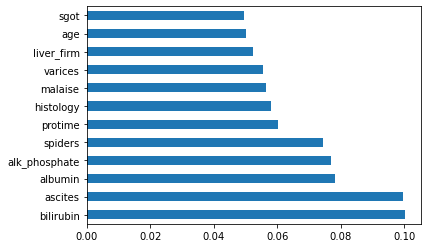

In [115]:
feature_imporance_df.nlargest(12).plot(kind='barh')

#### Narrative
+ All the methods gave us almost the same features to use

In [125]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


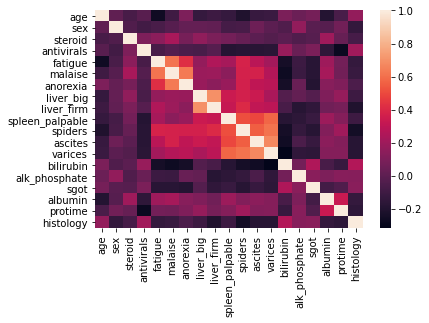

In [116]:
# Heatmap for correlation
sns.heatmap(xfeatures.corr())

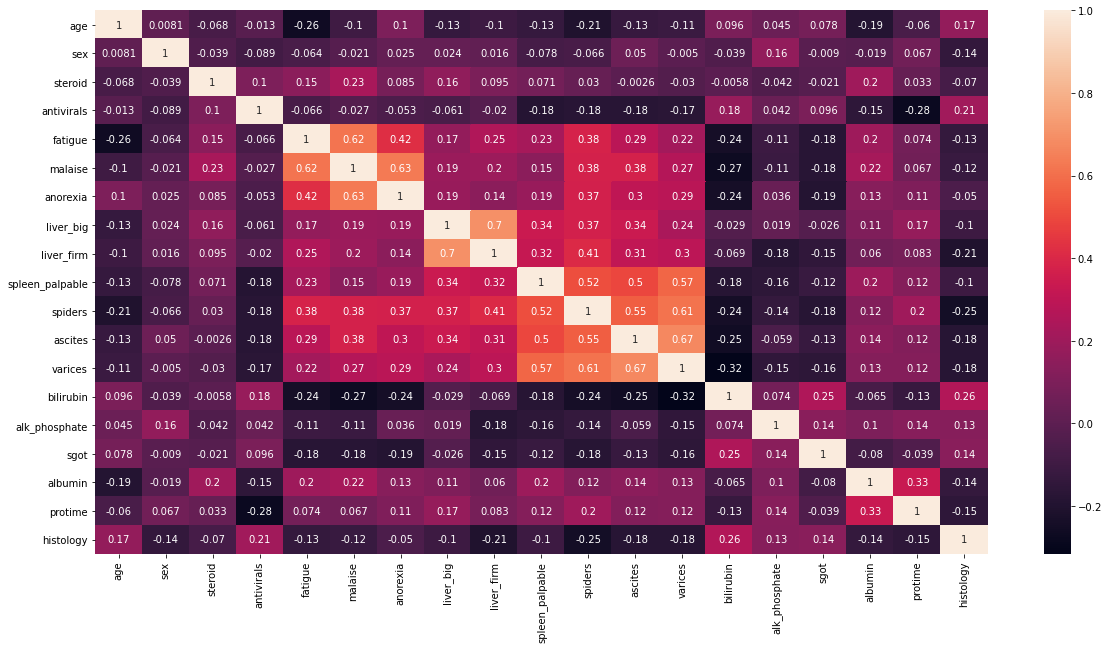

In [117]:
# Heatmap for Correlation with Annotation
plt.figure(figsize=(20,10))
sns.heatmap(xfeatures.corr(),annot=True)
plt.show()

### Model Building
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression
+ RF
+ DCT
+ Serialize

In [118]:
# Importing ML Pakages for building our model.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [119]:
# Features for Initial Data
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [120]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [133]:
ylabels = df['class']

In [137]:
# Selected Features
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [121]:
# Here we will be using the features that we obtained using the SelectKBest method and we add the 'sex' column too.
# We add this feature since if there is 'age' in our data, it intuitively feels right to add 'sex' to our feature list.
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

### Train Test Split

In [122]:
# train /test on entire feature set
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.30, random_state=7)

In [123]:
# train /test dataset for best feature set
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size=0.30, random_state=7)

#### Building Model using train/test split done on entire feature set

In [124]:
# Building Model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\Anoop\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [125]:
# Model Accuracy

# Method 1
logreg.score(x_test,y_test)

0.723404255319149

In [126]:
# Method 2 

logreg.predict(x_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [127]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [128]:
accuracy_score(y_test, logreg.predict(x_test))

0.723404255319149

#### Building Model on the selected best features

In [129]:
# Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b, y_train_b)

C:\Users\Anoop\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [130]:
# Model Accuracy

# Method 1

model_logit.score(x_test_b, y_test_b)

0.723404255319149

In [171]:
# Checking Prediction for a random single patient from our test data
x_test.iloc[1]

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [172]:
res_dic = {"Die":1,"Live":2}
x1 = x_test.iloc[1]

In [173]:
# We need to reshape our sample data because it is just 1 sample.
logreg.predict(np.array(x1).reshape(1,-1))

array([2], dtype=int64)

### Alternative Algorithms


In [131]:
clf = DecisionTreeClassifier()

In [137]:
# Fitting model using best features
clf.fit(x_train_b, y_train_b)

DecisionTreeClassifier()

In [138]:
# Model Accuracy Score
clf.score(x_test_b,y_test_b)

0.7446808510638298

In [139]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [150]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=3)

In [151]:
# Model Accuracy Score
knn.score(x_test_b,y_test_b)

0.7446808510638298

#### Save Our Model
+ Serialization (Python serialization is the act of converting a Python object into a byte stream.)
+ Pickle
+ Joblib
+ numpy/json/ray

In [152]:
# Using Joblib
import joblib

In [153]:
model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(model_logit, model_file)
model_file.close()

In [154]:
model_file_knn = open("knn_hepB_model.pkl","wb")
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [155]:
model_file_clf = open("decision_tree_clf_hepB_model.pkl","wb")
joblib.dump(clf, model_file_clf)
model_file_clf.close()

In [156]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [157]:
feature_names_best = xfeatures_best.columns

In [158]:
target_names = ["Die","Live"]

In [159]:
# Create A Dot Plot
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = feature_names_best, class_names = target_names)

In [160]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

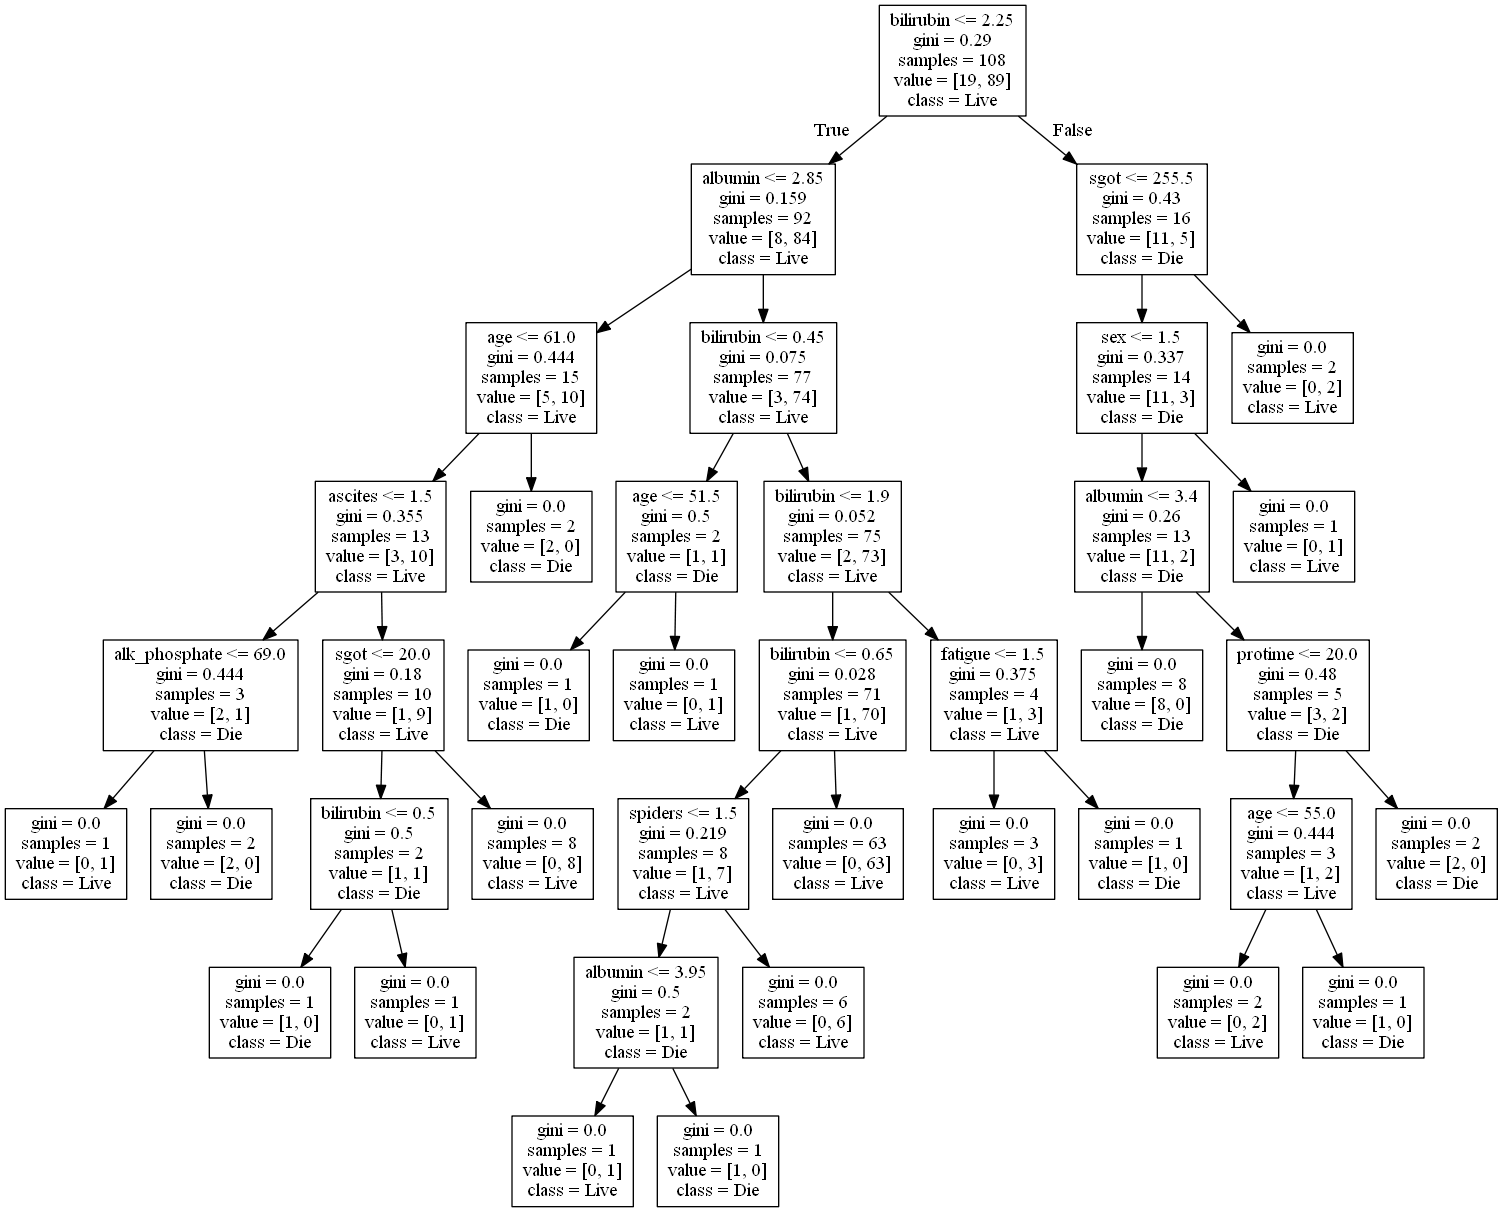

In [161]:
Image(graph.create_png())

In [162]:
# Save the plot
graph.write_png("hep_decisition_tree_plot.png")

True

### Interpret Model & Evaluate
+ Eli5
+ Lime
+ SHAP
+ Skater


In [165]:
# Intepreting with Lime
import lime
import lime.lime_tabular

In [166]:
# Methods and Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

In [ ]:
# Create Lime Explainer
+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [167]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [168]:
target_names

['Die', 'Live']

In [169]:
class_names = ["Die(1)","Live(2)"]

In [170]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
                                                   feature_names = feature_names_best,
                                                   class_names = class_names,
                                                   discretize_continuous = True)

In [174]:
x1

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [175]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [177]:
# Going back to our single sample prediction of x1. We see that the model classifies the sample to be 'alive'
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

array([2], dtype=int64)

In [178]:
# Building an explainer
exp = explainer.explain_instance(x_test_b.iloc[1], model_logit.predict_proba, num_features = 14, top_labels = 1)

In [179]:
exp.show_in_notebook(show_table = True, show_all = False)

In [180]:
# (Alternative method to explain) 
# Explanation as list why the model is giving 'live' as a classification
exp.as_list()

[('bilirubin > 1.50', -0.41439455706415274),
 ('sex <= 1.00', -0.2224856253043325),
 ('spiders <= 1.00', -0.1352208384846669),
 ('histology <= 1.00', 0.10945649452439185),
 ('alk_phosphate > 119.25', -0.10434844703401788),
 ('sgot > 90.50', 0.10027443267734816),
 ('age > 50.25', -0.06484690546023764),
 ('1.50 < steroid <= 2.00', 0.05009023250109989),
 ('2.98 < albumin <= 4.00', 0.04858914406077125),
 ('protime <= 0.00', 0.041923708471915906),
 ('fatigue <= 1.00', 0.029311568001675996),
 ('ascites <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [ ]:
### Using Eli5

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
import eli5

Using TensorFlow backend.


In [186]:
# Show how each feature contributes
eli5.show_weights(model_logit, top = 10)

In [187]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [188]:
# Show how each feature contributes
eli5.show_weights(model_logit, feature_names = feature_names_best , target_names = class_names)

Weight?,Feature
+1.139,sex
+0.747,spiders
+0.577,ascites
+0.502,albumin
+0.270,steroid
+0.018,<BIAS>
+0.004,sgot
-0.005,protime
-0.006,alk_phosphate
-0.016,age


In [190]:
# Show how each feature contributes for a particular patient
eli5.show_prediction(model_logit, x_test_b.iloc[1], feature_names = feature_names_best, target_names = class_names)

In [ ]:
### Evaluation of Model
+ Confuion Matrix
+ Classification Report
+ Accuracy Score

![](confusionmatrix_image.jpg)

In [193]:
# Importing Confusion Matrix from Sklearn
from sklearn.metrics import confusion_matrix

In [194]:
y_pred = model_logit.predict(x_test_b)

In [195]:
# Accuracy Score
accuracy_score(y_test, y_pred)

0.723404255319149

In [196]:
# Using Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 2, 11],
       [ 2, 32]], dtype=int64)

In [197]:
# Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix

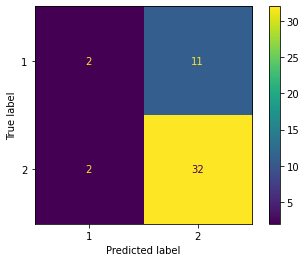

In [205]:
plot_confusion_matrix(model_logit, x_test_b, y_test_b)

In [208]:
# Classification report
from sklearn.metrics import classification_report

In [209]:
print(classification_report(y_test,y_pred))
# Die (1)
# Live (2)

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [215]:
df.to_csv("clean_hepatitis_dataset.csv",index = False)

In [216]:
freq_df.head()

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35


In [217]:
freq_df.to_csv("freq_df_hepatitis_dataset.csv")